# Skript um Codedaten mit den Refrenzen zu vergleichen
Idee 3 Skripte: 
1. Refrenzdaten zuschneiden (http://localhost:8888/notebooks/Documents/Jupyter%20Notebook/Bathy_lakecostance.ipynb)
2. Datena aus Code erstllen (http://localhost:8888/notebooks/Documents/Jupyter%20Notebook/Code_Masterarbeit_debugging/Code_Masterarbeit.ipynb)
3. Vergleiche (hier)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.tiff'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs(observed - estimated)
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())
    cmap = cm.get_cmap('jet_r')

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='jet_r', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Absolute Error')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, format='pdf')
    plt.close()


# Dummy-Funktion zum Einlesen von Rasterdaten als 1D-Array
def read_raster_as_flat_array(path):
    with rasterio.open(path) as src:
        array = src.read(1)
        mask = array != src.nodata if src.nodata is not None else ~np.isnan(array)
        return array[mask].flatten()

# Hauptteil: Dummy-Pfade zu GeoTIFF-Dateien
if __name__ == "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/":
    # Dummy-Dateipfade – bitte durch deine eigenen ersetzen
    path_depth_ref = "bathymetry_cropped.tif"
    path_depth_est = "data/depth_estimated.tif"

    path_cx_ref = "subset_5_of_20230906_cons_tsm.tif"
    path_cx_est = "data/cx_estimated.tif"

    path_cp_ref = "subset_4_of_20230906_conc_chl.tif"
    path_cp_est = "data/cp_estimated.tif"

    path_ay_ref = "subset_6_of_20230906_yellowmatter_new.tif"
    path_ay_est = "data/ay_estimated.tif"

    # Daten einlesen
    depth_obs = read_raster_as_flat_array(path_depth_ref)
    depth_est = read_raster_as_flat_array(path_depth_est)

    cx_obs = read_raster_as_flat_array(path_cx_ref)
    cx_est = read_raster_as_flat_array(path_cx_est)

    cp_obs = read_raster_as_flat_array(path_cp_ref)
    cp_est = read_raster_as_flat_array(path_cp_est)

    ay_obs = read_raster_as_flat_array(path_ay_ref)
    ay_est = read_raster_as_flat_array(path_ay_est)

    # Plots erstellen
    plot_scatter_with_metrics(depth_obs, depth_est, title='Depth [m]',
                              x_label='Estimated Depth [m]', y_label='Observed Depth [m]',
                              filename='plots/depth_plot.pdf')

    plot_scatter_with_metrics(cx_obs, cx_est, title='Suspended Matter [mg/L]',
                              x_label='Estimated C_X [mg/L]', y_label='Observed C_X [mg/L]',
                              filename='plots/cx_plot.pdf')

    plot_scatter_with_metrics(cp_obs, cp_est, title='Chlorophyll [µg/L]',
                              x_label='Estimated C_P [µg/L]', y_label='Observed C_P [µg/L]',
                              filename='plots/cp_plot.pdf')

    plot_scatter_with_metrics(ay_obs, ay_est, title='Gelbstoff (a_Y) [1/m]',
                              x_label='Estimated a_Y(λ₀) [1/m]', y_label='Observed a_Y(λ₀) [1/m]',
                              filename='plots/ay_plot.pdf')


/var/folders/n9/mpfght8n1v9cqqpcjnh1z29m0000gn/T/ipykernel_55751/3412047543.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet_r')


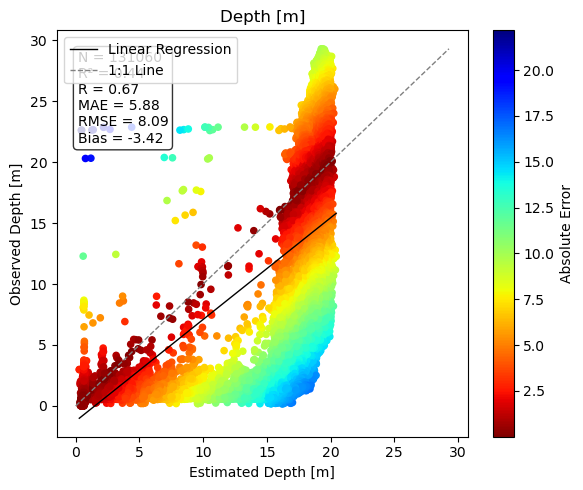

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs(observed - estimated)
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())
    cmap = cm.get_cmap('jet_r')

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='jet_r', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Absolute Error')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    plt.show()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
  #  plt.savefig(filename, dpi=300, format='pdf')
   # plt.close()


def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref_src:
        ref_array = ref_src.read(1)
        ref_array[ref_array<0]=np.nan
        ref_meta = ref_src.meta
        ref_crs = ref_src.crs
        ref_transform = ref_src.transform

    with rasterio.open(est_path) as est_src:
        est_array = est_src.read(1)
        est_array[est_array<0]=np.nan
        est_meta = est_src.meta

        # Leeres Array in Referenzgröße anlegen
        est_resampled = np.empty_like(ref_array, dtype=np.float32)

        reproject(
            source=est_array,
            destination=est_resampled,
            src_transform=est_src.transform,
            src_crs=est_src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear
        )

    # Beide Arrays auf gültige Werte beschränken (NaNs, NoData, Maskierung)
    mask = (~np.isnan(ref_array)) & (~np.isnan(est_resampled))
    ref_flat = ref_array[mask].flatten()
    est_flat = est_resampled[mask].flatten()

    return ref_flat, est_flat

# Hauptteil – ACHTUNG: __name__-Block korrigiert!
if __name__ == "__main__":
    # Dummy-Dateipfade – bitte durch deine eigenen ersetzen
    path_depth_ref = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/bathymetry_cropped.tif"
    path_depth_est = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/mosaic_depth_image_1.tif"
    #path_cx_ref = "subset_5_of_20230906_cons_tsm.tif"
    #path_cx_est = "data/cx_estimated.tif"

    #path_cp_ref = "subset_4_of_20230906_conc_chl.tif"
    #path_cp_est = "data/cp_estimated.tif"

    #path_ay_ref = "subset_6_of_20230906_yellowmatter_new.tif"
   # path_ay_est = "data/ay_estimated.tif"

    # Raster einlesen & zuschneiden
    depth_obs, depth_est = match_and_flatten_rasters(path_depth_ref, path_depth_est)
    #cx_obs, cx_est = match_and_flatten_rasters(path_cx_ref, path_cx_est)
    #cp_obs, cp_est = match_and_flatten_rasters(path_cp_ref, path_cp_est)
   #ay_obs, ay_est = match_and_flatten_rasters(path_ay_ref, path_ay_est)

    # Plots erstellen
    plot_scatter_with_metrics(depth_obs, depth_est, title='Depth [m]',
                              x_label='Estimated Depth [m]', y_label='Observed Depth [m]',
                              filename='plots/depth_plot.pdf')

    #plot_scatter_with_metrics(cx_obs, cx_est, title='Suspended Matter [mg/L]',
     #                         x_label='Estimated C_X [mg/L]', y_label='Observed C_X [mg/L]',
     #                         filename='plots/cx_plot.pdf')

    #plot_scatter_with_metrics(cp_obs, cp_est, title='Chlorophyll [µg/L]',
    #                          x_label='Estimated C_P [µg/L]', y_label='Observed C_P [µg/L]',
    #                          filename='plots/cp_plot.pdf')

   # plot_scatter_with_metrics(ay_obs, ay_est, title='Gelbstoff (a_Y) [1/m]',
    #                          x_label='Estimated a_Y(λ₀) [1/m]', y_label='Observed a_Y(λ₀) [1/m]',
    #                          filename='plots/ay_plot.pdf')


/var/folders/n9/mpfght8n1v9cqqpcjnh1z29m0000gn/T/ipykernel_58080/3999870340.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


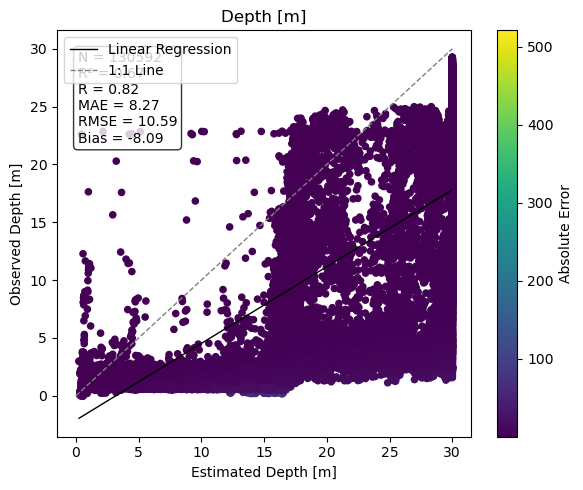

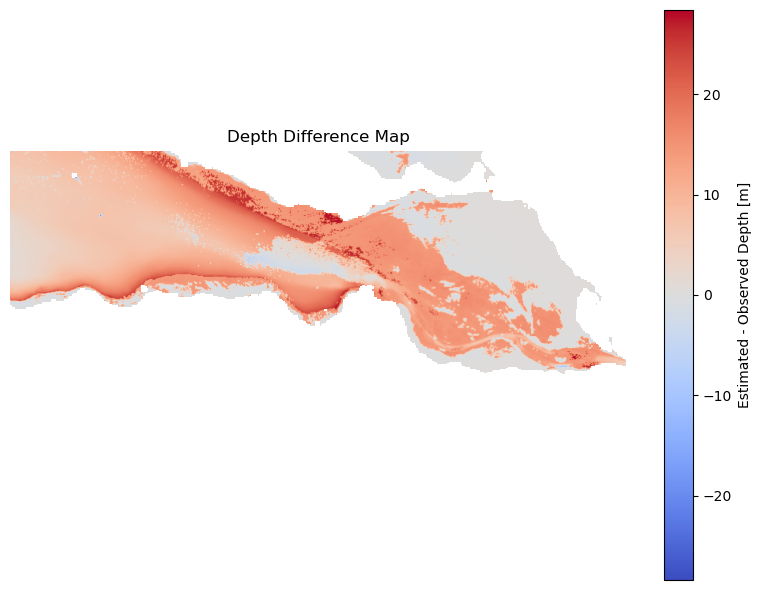

✅ Differenzkarte als GeoTIFF gespeichert.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs((observed - estimated) / observed)  
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())
    cmap = cm.get_cmap('viridis')

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='viridis', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Relative Error [%]')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    plt.show()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, format='pdf')
    plt.close()


def save_difference_map(diff_array, ref_meta, filename='difference_map.tif'):
    # Update metadata
    meta = ref_meta.copy()
    meta.update({
        "dtype": "float32",
        "count": 1,
        "nodata": np.nan
    })

    with rasterio.open(filename, "w", **meta) as dst:
        dst.write(diff_array.astype(np.float32), 1)


def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref_src:
        ref_array = ref_src.read(1)
        ref_array[ref_array < 0] = np.nan
        ref_meta = ref_src.meta
        ref_crs = ref_src.crs
        ref_transform = ref_src.transform

    with rasterio.open(est_path) as est_src:
        est_array = est_src.read(1)
        est_array[est_array < 0] = np.nan

        est_resampled = np.empty_like(ref_array, dtype=np.float32)

        reproject(
            source=est_array,
            destination=est_resampled,
            src_transform=est_src.transform,
            src_crs=est_src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear
        )

    # Differenzkarte für Export
    diff_map = est_resampled - ref_array
    diff_map[np.isnan(ref_array) | np.isnan(est_resampled)] = np.nan

    # Für Scatterplot
    mask = (~np.isnan(ref_array)) & (~np.isnan(est_resampled))
    ref_flat = ref_array[mask].flatten()
    est_flat = est_resampled[mask].flatten()

    return ref_flat, est_flat, diff_map, ref_meta


# Hauptteil
if __name__ == "__main__":
    path_depth_ref = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/bathymetry_cropped.tif"
    path_depth_est = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/mosaic_depth_image_1.tif"

    depth_obs, depth_est, depth_diff, depth_meta = match_and_flatten_rasters(path_depth_ref, path_depth_est)

    plot_scatter_with_metrics(depth_obs, depth_est, title='Depth [m]',
                              x_label='Estimated Depth [m]', y_label='Observed Depth [m]',
                              filename='plots/depth_plot.pdf')

    # Karte als Bild zeigen
    max_abs = np.nanmax(np.abs(depth_diff))
    plt.figure(figsize=(8, 6))
    im = plt.imshow(depth_diff, cmap="coolwarm",vmin=-max_abs, vmax=max_abs)
    plt.colorbar(im, label="Estimated - Observed Depth [m]")
    plt.title("Depth Difference Map")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/depth_difference_map.png", dpi=300)
    plt.show()

    # Export als GeoTIFF
    save_difference_map(depth_diff, depth_meta, filename="plots/depth_difference_map.tif")
    print("✅ Differenzkarte als GeoTIFF gespeichert.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [mg/l]', y_label='Observed [mg/l]', filename='scatterplot_tss.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs(observed - estimated)
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())
    cmap = cm.get_cmap('jet_r')

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='jet_r', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Absolute Error')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, format='pdf')
    plt.show()
    plt.close()


def save_difference_map(diff_array, ref_meta, filename='difference_map_tss.tif'):
    meta = ref_meta.copy()
    meta.update({
        "dtype": "float32",
        "count": 1,
        "nodata": np.nan
    })

    with rasterio.open(filename, "w", **meta) as dst:
        dst.write(diff_array.astype(np.float32), 1)


def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref_src:
        ref_array = ref_src.read(1)
        ref_array[ref_array <= 0] = np.nan
        ref_meta = ref_src.meta
        ref_crs = ref_src.crs
        ref_transform = ref_src.transform

    with rasterio.open(est_path) as est_src:
        est_array = est_src.read(1)
        est_array[est_array <= 0] = np.nan

        est_resampled = np.empty_like(ref_array, dtype=np.float32)

        reproject(
            source=est_array,
            destination=est_resampled,
            src_transform=est_src.transform,
            src_crs=est_src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear
        )

    diff_map = est_resampled - ref_array
    diff_map[np.isnan(ref_array) | np.isnan(est_resampled)] = np.nan

    mask = (~np.isnan(ref_array)) & (~np.isnan(est_resampled))
    ref_flat = ref_array[mask].flatten()
    est_flat = est_resampled[mask].flatten()

    return ref_flat, est_flat, diff_map, ref_meta


# ---------- Hauptteil ----------
if __name__ == "__main__":
    path_cx_ref = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/reference_cx.tif"  # 🔁 Pfad zur Referenz-TSS
    path_cx_est = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/estimated_cx_image_1.tif"  # 🔁 Pfad zur berechneten TSS

    cx_obs, cx_est, cx_diff, cx_meta = match_and_flatten_rasters(path_cx_ref, path_cx_est)

    # ➤ Scatterplot mit Fehlerstatistik
    plot_scatter_with_metrics(
        cx_obs, cx_est,
        title='TSS [mg/l]',
        x_label='Estimated TSS [mg/l]',
        y_label='Observed TSS [mg/l]',
        filename='plots/scatter_tss.pdf'
    )

    # ➤ Differenzkarte anzeigen
    max_abs = np.nanmax(np.abs(cx_diff))
    plt.figure(figsize=(8, 6))
    im = plt.imshow(cx_diff, cmap="RdBu", vmin=-max_abs, vmax=max_abs)
    plt.colorbar(im, label="Estimated - Observed TSS [mg/l]")
    plt.title("TSS Difference Map")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/tss_difference_map.png", dpi=300)
    plt.show()

    # ➤ GeoTIFF speichern
    save_difference_map(cx_diff, cx_meta, filename="plots/tss_difference_map.tif")
    print("✅ TSS Differenzkarte als GeoTIFF gespeichert.")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='', y_label='', filename='scatter_cp.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs(observed - estimated)
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='jet_r', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Absolute Error")

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()

def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref_src:
        ref_array = ref_src.read(1)
        ref_array[ref_array <= 0] = np.nan
        ref_meta = ref_src.meta
        ref_crs = ref_src.crs
        ref_transform = ref_src.transform

    with rasterio.open(est_path) as est_src:
        est_array = est_src.read(1)
        est_array[est_array <= 0] = np.nan

        est_resampled = np.empty_like(ref_array, dtype=np.float32)

        reproject(
            source=est_array,
            destination=est_resampled,
            src_transform=est_src.transform,
            src_crs=est_src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear
        )

    diff_map = est_resampled - ref_array
    diff_map[np.isnan(ref_array) | np.isnan(est_resampled)] = np.nan

    mask = (~np.isnan(ref_array)) & (~np.isnan(est_resampled))
    ref_flat = ref_array[mask].flatten()
    est_flat = est_resampled[mask].flatten()

    return ref_flat, est_flat, diff_map, ref_meta

def save_difference_map(diff_array, ref_meta, filename='difference_map_cp.tif'):
    meta = ref_meta.copy()
    meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
    with rasterio.open(filename, "w", **meta) as dst:
        dst.write(diff_array.astype(np.float32), 1)

# ---- MAIN ----
if __name__ == "__main__":
    path_cp_ref = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/reference_cp.tif"
    path_cp_est = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/estimated_cp_image_1.tif"

    cp_obs, cp_est, cp_diff, cp_meta = match_and_flatten_rasters(path_cp_ref, path_cp_est)

    plot_scatter_with_metrics(
        cp_obs, cp_est,
        title='Chlorophyll-a Concentration',
        x_label='Estimated [µg/l]',
        y_label='Observed [µg/l]',
        filename='plots/scatter_cp.pdf'
    )

    plt.figure(figsize=(8, 6))
    im = plt.imshow(cp_diff, cmap="RdBu", vmin=-np.nanmax(abs(cp_diff)), vmax=np.nanmax(abs(cp_diff)))
    plt.colorbar(im, label="Estimated - Observed [µg/l]")
    plt.title("Chlorophyll-a Difference Map")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/cp_difference_map.png", dpi=300)
    plt.show()

    save_difference_map(cp_diff, cp_meta, filename="plots/cp_difference_map.tif")
    print("✅ Chlorophyll-a Differenzkarte gespeichert.")


RasterioIOError: /Users/annikaklein/Desktop/Masterarbeit/Beispielarea/reference_cp.tif: No such file or directory

In [ ]:
# Nur Titel, Einheiten, Dateinamen und Pfade ändern:

if __name__ == "__main__":
    path_ay_ref = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/reference_ay.tif"
    path_ay_est = "/Users/annikaklein/Desktop/Masterarbeit/Beispielarea/estimated_ay_image_1.tif"

    ay_obs, ay_est, ay_diff, ay_meta = match_and_flatten_rasters(path_ay_ref, path_ay_est)

    plot_scatter_with_metrics(
        ay_obs, ay_est,
        title='Yellow Matter Absorption',
        x_label='Estimated a_Y(λ₀) [1/m]',
        y_label='Observed a_Y(λ₀) [1/m]',
        filename='plots/scatter_ay.pdf'
    )

    plt.figure(figsize=(8, 6))
    im = plt.imshow(ay_diff, cmap="RdBu", vmin=-np.nanmax(abs(ay_diff)), vmax=np.nanmax(abs(ay_diff)))
    plt.colorbar(im, label="Estimated - Observed [1/m]")
    plt.title("Yellow Matter Difference Map")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/ay_difference_map.png", dpi=300)
    plt.show()

    save_difference_map(ay_diff, ay_meta, filename="plots/ay_difference_map.tif")
    print("✅ Yellow Matter Differenzkarte gespeichert.")


/var/folders/n9/mpfght8n1v9cqqpcjnh1z29m0000gn/T/ipykernel_58080/1969131302.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


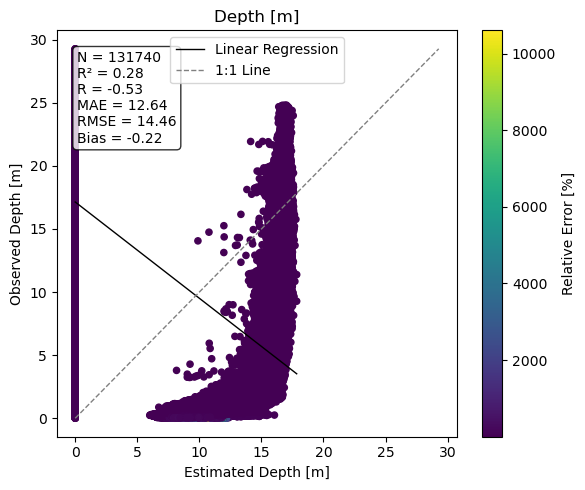

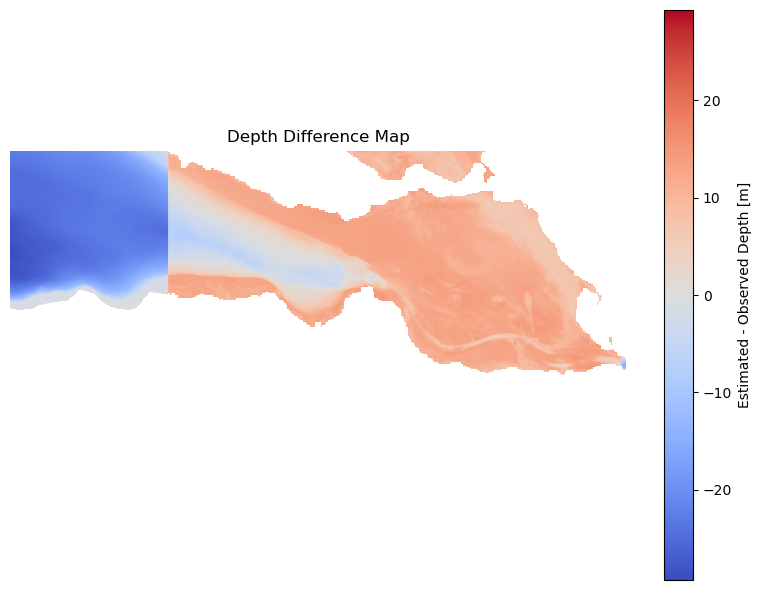

✅ Differenzkarte als GeoTIFF gespeichert.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs((observed - estimated) / observed)  
    norm = mcolors.Normalize(vmin=errors.min(), vmax=errors.max())
    cmap = cm.get_cmap('viridis')

    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='viridis', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Relative Error [%]')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    plt.show()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, format='pdf')
    plt.close()


def save_difference_map(diff_array, ref_meta, filename='difference_map.tif'):
    # Update metadata
    meta = ref_meta.copy()
    meta.update({
        "dtype": "float32",
        "count": 1,
        "nodata": np.nan
    })

    with rasterio.open(filename, "w", **meta) as dst:
        dst.write(diff_array.astype(np.float32), 1)


def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref_src:
        ref_array = ref_src.read(1)
        ref_array[ref_array < 0] = np.nan
        ref_meta = ref_src.meta
        ref_crs = ref_src.crs
        ref_transform = ref_src.transform

    with rasterio.open(est_path) as est_src:
        est_array = est_src.read(1)
        est_array[est_array < 0] = np.nan

        est_resampled = np.empty_like(ref_array, dtype=np.float32)

        reproject(
            source=est_array,
            destination=est_resampled,
            src_transform=est_src.transform,
            src_crs=est_src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear
        )

    # Differenzkarte für Export
    diff_map = est_resampled - ref_array
    diff_map[np.isnan(ref_array) | np.isnan(est_resampled)] = np.nan

    # Für Scatterplot
    mask = (~np.isnan(ref_array)) & (~np.isnan(est_resampled))
    ref_flat = ref_array[mask].flatten()
    est_flat = est_resampled[mask].flatten()

    return ref_flat, est_flat, diff_map, ref_meta


# Hauptteil
if __name__ == "__main__":
    path_depth_ref = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/bathymetry_cropped.tif"
    path_depth_est = "/Users/annikaklein/Documents/Jupyter Notebook/Code_Masterarbeit_debugging/depth_tiffs/depth_image3_B3.tif"

    depth_obs, depth_est, depth_diff, depth_meta = match_and_flatten_rasters(path_depth_ref, path_depth_est)

    plot_scatter_with_metrics(depth_obs, depth_est, title='Depth [m]',
                              x_label='Estimated Depth [m]', y_label='Observed Depth [m]',
                              filename='plots/depth_plot.pdf')

    # Karte als Bild zeigen
    max_abs = np.nanmax(np.abs(depth_diff))
    plt.figure(figsize=(8, 6))
    im = plt.imshow(depth_diff, cmap="coolwarm",vmin=-max_abs, vmax=max_abs)
    plt.colorbar(im, label="Estimated - Observed Depth [m]")
    plt.title("Depth Difference Map")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/depth_difference_map.png", dpi=300)
    plt.show()

    # Export als GeoTIFF
    save_difference_map(depth_diff, depth_meta, filename="plots/depth_difference_map.tif")
    print("✅ Differenzkarte als GeoTIFF gespeichert.")

In [24]:
# Vergleich
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os

# 🔧 Funktion: Scatterplot mit Metriken
def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs((observed - estimated) / observed)
    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='viridis', s=20)

    # Regressionslinie
    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Regression')
    ax.plot([reg_x.min(), reg_x.max()], [reg_x.min(), reg_x.max()], '--', color='gray', label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Relative Error')

    # Statistiken
    stat_text = '\n'.join([
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ])
    ax.text(0.05, 0.95, stat_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.legend()
    plt.tight_layout()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300)
    plt.close()

# 🔧 Funktion: GeoTIFF mit Differenz speichern
def save_difference_map(diff_array, ref_meta, filename='difference_map.tif'):
    meta = ref_meta.copy()
    meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
    with rasterio.open(filename, "w", **meta) as dst:
        dst.write(diff_array.astype(np.float32), 1)

# 🔧 Funktion: Rastern abgleichen
def match_and_flatten_rasters(ref_path, est_path):
    with rasterio.open(ref_path) as ref:
        ref_data = ref.read(1).astype(np.float32)
        ref_data[ref_data < 0] = np.nan
        ref_meta = ref.meta
        transform = ref.transform
        crs = ref.crs

    with rasterio.open(est_path) as est:
        est_data = est.read(1).astype(np.float32)
        est_data[est_data < 0] = np.nan
        est_resampled = np.empty_like(ref_data, dtype=np.float32)

        reproject(
            source=est_data,
            destination=est_resampled,
            src_transform=est.transform,
            src_crs=est.crs,
            dst_transform=transform,
            dst_crs=crs,
            resampling=Resampling.bilinear
        )

    diff = est_resampled - ref_data
    diff[np.isnan(ref_data) | np.isnan(est_resampled)] = np.nan

    mask = (~np.isnan(ref_data)) & (~np.isnan(est_resampled))
    return ref_data[mask], est_resampled[mask], diff, ref_meta

# 🔍 Analyse starten
if __name__ == "__main__":
    bands = ['B2', 'B3', 'B4', 'B7']
    ref_path = "/Users/annikaklein/Desktop/Masterarbeit /Beispielarea/bathymetry_cropped.tif"  # ✏️ Pfad anpassen!
    depth_folder = "/Users/annikaklein/Documents/Jupyter Notebook/Code_Masterarbeit_debugging/depth_tiffs"          # ✏️ Pfad anpassen!

    
    
    
    
    for band in bands:
        print(f"\n🔍 Vergleiche Band {band}...")

        est_path = os.path.join(depth_folder, f"depth_image3_{band}.tif")
        ref_flat, est_flat, diff_map, ref_meta = match_and_flatten_rasters(ref_path, est_path)

        # 📊 Scatterplot
        plot_scatter_with_metrics(
            ref_flat, est_flat,
            title=f'Depth Estimation – {band}',
            x_label='Estimated Depth [m]',
            y_label='Observed Depth [m]',
            filename=f'plots/scatter_depth_{band}.pdf'
        )

        # 🗺️ Differenzkarte
        max_abs = np.nanmax(np.abs(diff_map))
        plt.figure(figsize=(8, 6))
        plt.imshow(diff_map, cmap='coolwarm', vmin=-max_abs, vmax=max_abs)
        plt.colorbar(label='Estimated - Observed [m]')
        plt.title(f'Depth Difference Map – {band}')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f'plots/diff_map_{band}.png', dpi=300)
        plt.close()

        # 💾 GeoTIFF speichern
        save_difference_map(diff_map, ref_meta, filename=f"plots/diff_map_{band}.tif")
        print(f"✅ Band {band} abgeschlossen.")



🔍 Vergleiche Band B2...
✅ Band B2 abgeschlossen.

🔍 Vergleiche Band B3...
✅ Band B3 abgeschlossen.

🔍 Vergleiche Band B4...
✅ Band B4 abgeschlossen.

🔍 Vergleiche Band B7...
✅ Band B7 abgeschlossen.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import linregress
import os

def plot_scatter_with_metrics(observed, estimated, title='', x_label='Estimated [unit]', y_label='Observed [unit]', filename='scatterplot.pdf'):
    slope, intercept, r, _, _ = linregress(estimated, observed)
    r2 = r**2
    mae = mean_absolute_error(observed, estimated)
    rmse = np.sqrt(mean_squared_error(observed, estimated))
    bias = np.mean(observed - estimated)
    n = len(observed)

    errors = np.abs((observed - estimated) / observed)
    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(estimated, observed, c=errors, cmap='viridis', s=20)

    reg_x = np.linspace(min(estimated), max(estimated), 100)
    reg_y = slope * reg_x + intercept
    ax.plot(reg_x, reg_y, color='black', linewidth=1, label='Linear Regression')

    min_val = min(min(estimated), min(observed))
    max_val = max(max(estimated), max(observed))
    ax.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='1:1 Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Relative Error [%]')

    textstr = '\n'.join((
        f'N = {n}',
        f'R² = {r2:.2f}',
        f'R = {r:.2f}',
        f'MAE = {mae:.2f}',
        f'RMSE = {rmse:.2f}',
        f'Bias = {bias:.2f}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend()
    plt.tight_layout()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, dpi=300, format='pdf')
    plt.show()
    plt.close()

def calculate_band_ratio(band1_path, band2_path, output_path):
    with rasterio.open(band1_path) as src1, rasterio.open(band2_path) as src2:
        band1 = src1.read(1).astype(np.float32)
        band2 = src2.read(1).astype(np.float32)
        meta = src1.meta.copy()

    band1[band1 <= 0] = np.nan
    band2[band2 <= 0] = np.nan
    ratio = band1 / band2
    ratio[np.isnan(band1) | np.isnan(band2)] = np.nan
    meta.update(dtype='float32', nodata=np.nan)

    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(ratio.astype(np.float32), 1)

    return output_path

def analyze_ratio_to_depth(ratio_path, ref_path, scatter_out='scatter_ratio.pdf', map_out='map_ratio.png'):
    with rasterio.open(ref_path) as ref_src:
        ref = ref_src.read(1).astype(np.float32)
        ref[ref < 0] = np.nan
        ref_meta = ref_src.meta
        transform = ref_src.transform
        crs = ref_src.crs

    with rasterio.open(ratio_path) as ratio_src:
        ratio = ratio_src.read(1).astype(np.float32)
        ratio[ratio <= 0] = np.nan

        resampled_ratio = np.empty_like(ref, dtype=np.float32)

        reproject(
            source=ratio,
            destination=resampled_ratio,
            src_transform=ratio_src.transform,
            src_crs=ratio_src.crs,
            dst_transform=transform,
            dst_crs=crs,
            resampling=Resampling.bilinear
        )

    # Nur Bereich 5–15 m analysieren
    mask = (~np.isnan(ref)) & (~np.isnan(resampled_ratio)) & (ref >= 5) & (ref <= 15)
    ref_values = ref[mask]
    ratio_values = resampled_ratio[mask]

    # Scatterplot & Regression
    plot_scatter_with_metrics(
        observed=ref_values,
        estimated=ratio_values,
        title='Ratio (B3/B4) vs Observed Depth (5–15 m)',
        x_label='Green/Red Ratio',
        y_label='Observed Depth [m]',
        filename=scatter_out
    )

    # Visualisierung als Karte
    plt.figure(figsize=(8, 6))
    plt.imshow(resampled_ratio, cmap='Spectral_r')
    plt.title('B3/B4 Ratio (Green/Red)')
    plt.axis('off')
    plt.colorbar(label='Ratio Value')
    plt.tight_layout()
    plt.savefig(map_out, dpi=300)
    plt.close()

# 🔹 Pfade definieren
green_band_path = '/Users/annikaklein/Documents/Jupyter Notebook/Code_Masterarbeit_debugging/depth_tiffs/depth_image3_B3.tif'  # Grün
red_band_path = '/Users/annikaklein/Documents/Jupyter Notebook/Code_Masterarbeit_debugging/depth_tiffs/depth_image3_B4.tif'    # Rot
ref_bathy_path = '/Users/annikaklein/Documents/Jupyter Notebook/Code_Masterarbeit_debugging/depth_tiffs/depth_image3_B7.tif'

# 🔹 Ratio berechnen & speichern
ratio_output = 'plots/b3_b4_ratio.tif'
calculate_band_ratio(green_band_path, red_band_path, ratio_output)

# 🔹 Analyse
analyze_ratio_to_depth(
    ratio_path=ratio_output,
    ref_path=ref_bathy_path,
    scatter_out='plots/ratio_scatter_green_red.pdf',
    map_out='plots/ratio_map_green_red.png'
)

ValueError: Inputs must not be empty.

In [ ]:
# Platzhalterpfade – bitte anpassen
ratio_input = 'plots/b3_b4_ratio.tif'  # Pfad zu deiner Band-Ratio (Grün/Rot)
depth_reference = '/Users/annikaklein/your_folder/bathymetry_cropped.tif'  # Pfad zur Referenz-Bathymetrie
output_depth_estimated = 'plots/depth_estimated_from_ratio.tif'  # Wohin das Ergebnis gespeichert wird


In [27]:
! pip install earthengine-api geemap rasterio numpy matplotlib


In [28]:
import ee
import geemap
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Authentifizierung und Initialisierung der Earth Engine API
ee.Authenticate()
ee.Initialize()

# Definition des Untersuchungsgebiets am Bodensee
aoi = ee.Geometry.Rectangle([9.6000, 47.5000, 9.7500, 47.5500])

# Funktion zur Wolkenmaskierung für Sentinel-2-Bilder
def mask_clouds(image):
    cloud_prob = image.select('MSK_CLDPRB')
    is_not_cloud = cloud_prob.lt(20)
    return image.updateMask(is_not_cloud)

# Abruf der Sentinel-2-Bildersammlung für das definierte Gebiet und den Zeitraum
collection = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(aoi)
    .filterDate('2024-06-01', '2024-06-30')
    .map(mask_clouds)
)

# Erstellung eines Mosaiks aus den gefilterten Bildern
image = collection.median().clip(aoi)

# Berechnung des Grün/Rot-Bandverhältnisses (B3/B4)
green = image.select('B3')
red = image.select('B4')
ndwi = green.divide(red).rename('NDWI')

# Hinzufügen des NDWI-Bands zum Bild
image = image.addBands(ndwi)

# Definition der Exportparameter
task = ee.batch.Export.image.toDrive(
    image=image.select(['B3', 'B4', 'NDWI']),
    description='Sentinel2_Bodensee',
    folder='GEE_Exports',
    fileNamePrefix='Sentinel2_Bodensee',
    region=aoi,
    scale=10,
    crs='EPSG:32632'
)

# Starten des Exportvorgangs
task.start()

print("Export gestartet. Überprüfe den Fortschritt in der GEE-Benutzeroberfläche.")

# Lokaler Pfad, in den die Datei heruntergeladen wird
local_download_path = '/Pfad/zu/deinem/Download-Ordner/Sentinel2_Bodensee.tif'

# Warten, bis der Export abgeschlossen ist
import time
while task.active():
    print('Warte auf Abschluss des Exports...')
    time.sleep(30)

print('Export abgeschlossen. Datei wird heruntergeladen...')

# Herunterladen der Datei von Google Drive
geemap.download_from_drive('Sentinel2_Bodensee.tif', local_download_path)

print(f'Datei heruntergeladen nach {local_download_path}')

# Anwendung des C2RCC-Prozessors mit SNAP/snappy
# Annahme: SNAP ist installiert und snappy ist konfiguriert

import snappy
from snappy import ProductIO, GPF, HashMap

# Laden des heruntergeladenen Sentinel-2-Bildes
product = ProductIO.readProduct(local_download_path)

# Setzen der Parameter für den C2RCC-Prozessor
parameters = HashMap()
parameters.put('sensor', 'SENTINEL-2')
parameters.put('outputAsRrs', True)
parameters.put('deriveRw', True)
parameters.put('landMask', False)

# Ausführen des C2RCC-Prozessors
c2rcc_product = GPF.createProduct('c2rcc', parameters, product)

# Speichern der Ergebnisse
output_path = '/Pfad/zu/deinem/Arbeitsverzeichnis/Sentinel2_Bodensee_C2RCC.dim'
ProductIO.writeProduct(c2rcc_product, output_path, 'BEAM-DIMAP')

print(f'C2RCC-Verarbeitung abgeschlossen. Ergebnisse gespeichert unter {output_path}')

# Optional: Visualisierung der Ergebnisse
chl_band = c2rcc_product.getBand('conc_chl')
width = chl_band.getRasterWidth()
height = chl_band.getRasterHeight()
chl_data = np.zeros(width * height, np.float32)
chl_band.readPixels(0, 0, width, height, chl_data)
chl_data = chl_data.reshape(height, width)
chl_data[chl_data < 0] = np.nan

plt.figure(figsize=(10, 6))
plt.imshow(chl_data, cmap='viridis')
plt.title('Chlorophyll-a Konzentration')
plt.colorbar(label='µg/l')
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.tight_layout()
plt.show()


Enter verification code: 4/1Ab_5qlmMrid5zwWlSpBUDoCgMgj_UAEIrTbM1E5fJj-p5TwcYNZC8y5WtTw

Successfully saved authorization token.
Export gestartet. Überprüfe den Fortschritt in der GEE-Benutzeroberfläche.
Warte auf Abschluss des Exports...
Warte auf Abschluss des Exports...
Export abgeschlossen. Datei wird heruntergeladen...


AttributeError: module 'geemap' has no attribute 'download_from_drive'

In [31]:
from sentinelsat import SentinelAPI, geojson_to_wkt
from datetime import date
import os

# --------------------------- #
# 🔐 Zugangsdaten für SciHub
# --------------------------- #
USERNAME = 'annika.klein@tu-braunschweig.de'  # <- ändern!
PASSWORD = 'LEAN59GrDe.,'  # <- ändern!
api_url = 'https://scihub.copernicus.eu/dhus'

# --------------------------- #
# 🌍 Bodensee als Polygon
# --------------------------- #
bodensee_wkt = "POLYGON((9.3 47.6, 9.3 47.8, 9.7 47.8, 9.7 47.6, 9.3 47.6))"

# --------------------------- #
# 📅 Zeitraum
# --------------------------- #
start_date = date(2023, 8, 1)
end_date = date(2023, 8, 31)

# --------------------------- #
# 🔍 Abfrage und Download
# --------------------------- #
api = SentinelAPI(USERNAME, PASSWORD, api_url)
products = api.query(
    area=bodensee_wkt,
    date=(start_date, end_date),
    platformname='Sentinel-2',
    producttype='S2MSI1C',
    cloudcoverpercentage=(0, 10)  # optional anpassen
)

# Wähle das beste Produkt (geringste Wolkenbedeckung)
products_df = api.to_dataframe(products)
products_df_sorted = products_df.sort_values('cloudcoverpercentage')
if products_df_sorted.empty:
    print("❌ Kein passendes Produkt gefunden.")
else:
    selected_product = products_df_sorted.iloc[0]
    print(f"📦 Produkt ausgewählt: {selected_product['title']} mit {selected_product['cloudcoverpercentage']}% Wolken")

    # Ordner für Download
    download_dir = "downloads"
    os.makedirs(download_dir, exist_ok=True)

    # Download starten
    api.download(selected_product.name, directory_path=download_dir)
    print(f"✅ Download abgeschlossen: {selected_product['title']}")


ConnectionError: HTTPSConnectionPool(host='scihub.copernicus.eu', port=443): Max retries exceeded with url: /dhus/search?format=json&rows=100&start=0&q=beginPosition%3A%5B%222023-08-01T00%3A00%3A00Z%22+TO+%222023-08-31T00%3A00%3A00Z%22%5D+cloudcoverpercentage%3A%5B%220%22+TO+%2210%22%5D+platformname%3A%22Sentinel-2%22+producttype%3A%22S2MSI1C%22+footprint%3A%22Intersects%28POLYGON%28%289.3+47.6%2C+9.3+47.8%2C+9.7+47.8%2C+9.7+47.6%2C+9.3+47.6%29%29%29%22 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x16958e120>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [30]:
! pip install sentinelsat


  Preparing metadata (setup.py) ... done
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33111 sha256=7fc5115c9a8aff330436c547ca773e8a9602bc1ff1fc2ee0e2fbd6a0dca90e2d
  Stored in directory: /Users/annikaklein/Library/Caches/pip/wheels/2b/01/23/578505d65e2a97d78bf1fe3fc8256ecf37572dc1df598b0eaf
Successfully built html2text
